In [1]:
# All required imports
import numpy as np
import matplotlib.pyplot as plt
import util
import copy
import math
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import linear_regression as lr
x_train, y_train = util.load_restaurant_data()

# From previos example
w_initial = 0
b_initial = 0

w_single, b_single, _ = lr.gradient_descent(x_train, y_train, w_initial, b_initial, 0.01, 0, 1500, False)
y_single = np.dot(x_train, w_single) + b_single
util.print_table(x_train=x_train, y_train=y_train, y_single=y_single, rows=10)
print("w,b found by gradient descent:", w_single, b_single)

+---------+---------+----------+
| x_train | y_train | y_single |
+---------+---------+----------+
|  6.110  |  17.592 |  3.496   |
|  5.528  |  9.130  |  2.817   |
|  8.519  |  13.662 |  6.305   |
|  7.003  |  11.854 |  4.538   |
|  5.860  |  6.823  |  3.204   |
|  8.383  |  11.886 |  6.147   |
|  7.476  |  4.348  |  5.090   |
|  8.578  |    12   |  6.375   |
|  6.486  |  6.599  |  3.935   |
|  5.055  |  3.817  |  2.265   |
+---------+---------+----------+
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degrees = 8
x_train_p = PolynomialFeatures(degree=degrees, include_bias=False).fit_transform(x_train.reshape((-1, 1)))
lr_model  = LinearRegression()
params    = lr_model.fit(x_train_p, y_train)

w_poly, b_poly = params.coef_, params.intercept_
y_poly         = lr_model.predict(x_train_p)

util.print_training_data(x_train_p, y_train, rows=10)

+-------+--------+---------+----------+-----------+------------+-------------+--------------+---------+
|  x0s  |  x1s   |   x2s   |   x3s    |    x4s    |    x5s     |     x6s     |     x7s      | y_train |
+-------+--------+---------+----------+-----------+------------+-------------+--------------+---------+
| 6.110 | 37.333 | 228.110 | 1393.777 |  8516.116 | 52034.323  |  317934.917 | 1942614.137  |  17.592 |
| 5.528 | 30.555 | 168.901 | 933.637  |  5160.863 | 28527.702  |  157692.578 |  871677.266  |  9.130  |
| 8.519 | 72.567 | 618.165 | 5265.904 | 44858.126 | 382128.435 | 3255199.287 | 27729740.646 |  13.662 |
| 7.003 | 49.045 | 343.471 | 2405.393 | 16845.451 | 117972.063 |  826181.955 | 5785917.464  |  11.854 |
| 5.860 | 34.337 | 201.209 | 1179.047 |  6908.981 | 40485.244  |  237235.433 | 1390152.187  |  6.823  |
| 8.383 | 70.273 | 589.092 | 4938.296 | 41397.244 | 347028.955 | 2909109.029 | 24386770.082 |  11.886 |
| 7.476 | 55.897 | 417.905 | 3124.425 | 23359.452 | 174644.604 |

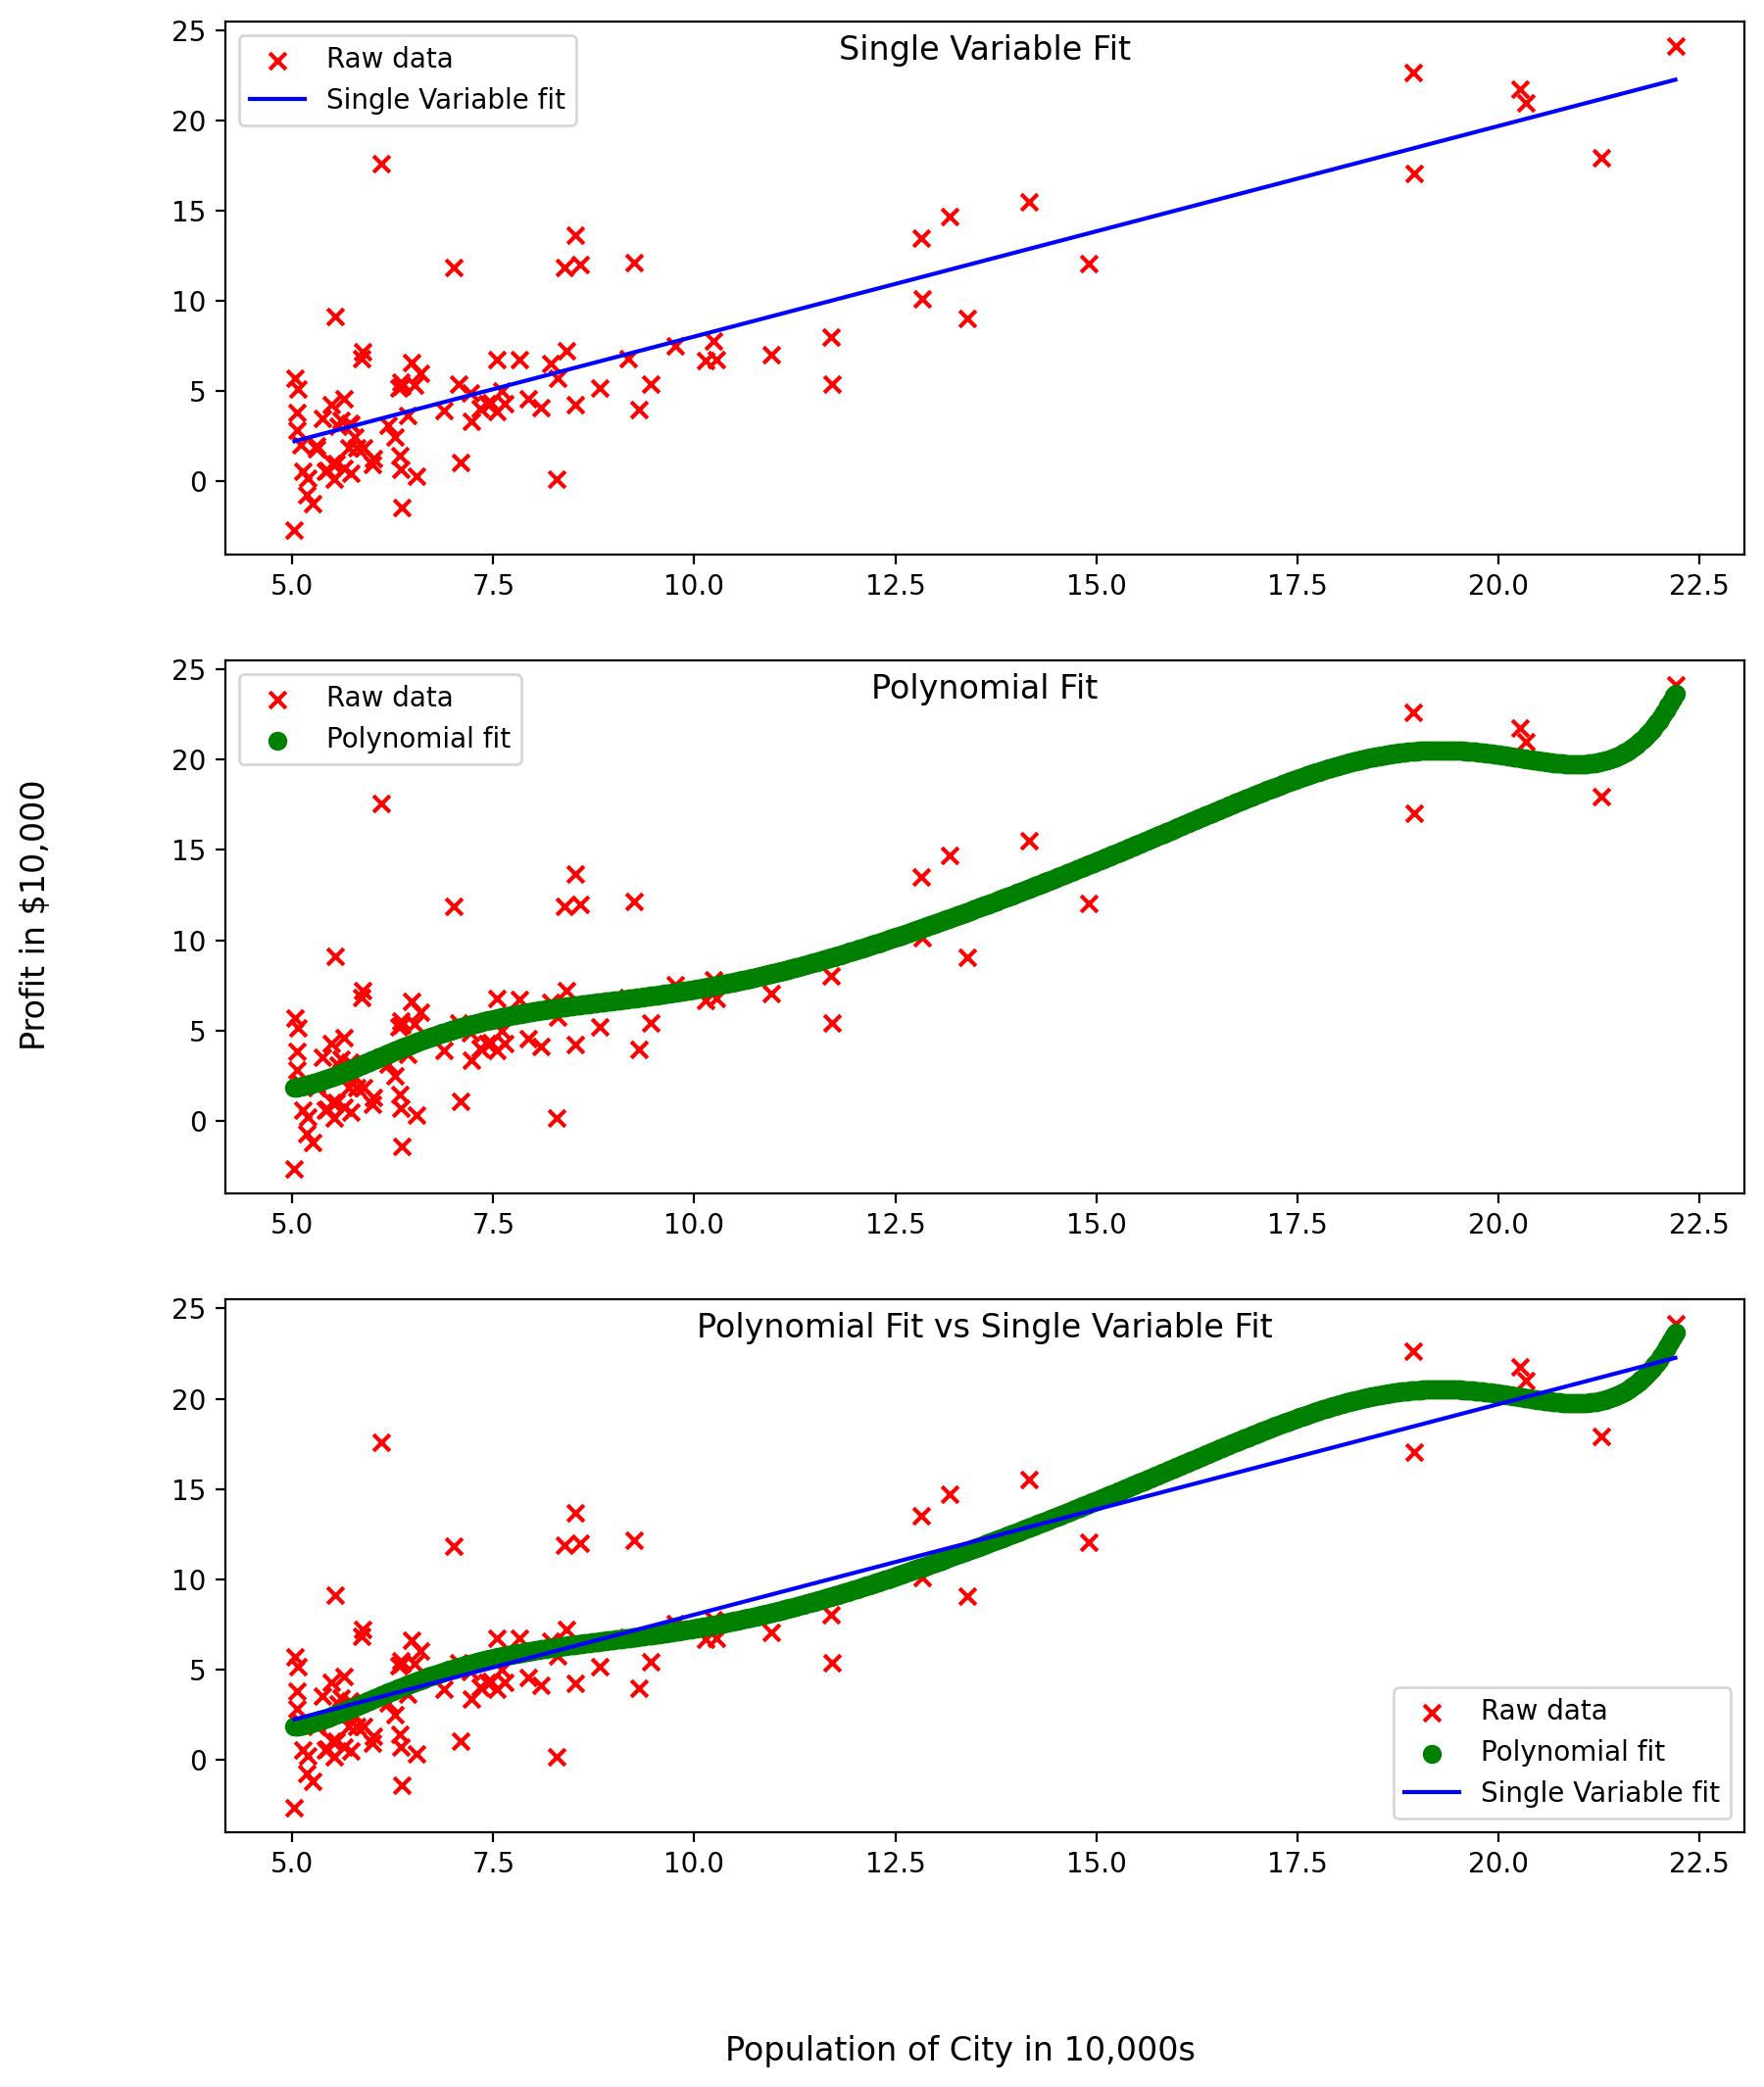

In [4]:
# changin data points for plotting
x_train_new   = np.linspace(np.min(x_train), np.max(x_train), 1000)
y_single      = np.dot(x_train_new, w_single) + b_single
x_train_new_p = PolynomialFeatures(degree=degrees, include_bias=False).fit_transform(x_train_new.reshape((-1, 1)))
y_poly        = np.dot(x_train_new_p, w_poly) + b_poly

fig, ax = plt.subplots(3, 1, figsize=(10,12))

ax[0].scatter(x_train, y_train, color='r', marker='x', label='Raw data')
ax[0].plot(x_train_new, y_single, color='b', label='Single Variable fit')
ax[0].set_title('Single Variable Fit', y=1.0, pad=-14)
ax[0].legend()

ax[1].scatter(x_train, y_train, color='r', marker='x', label='Raw data')
ax[1].scatter(x_train_new, y_poly, color='g', label='Polynomial fit')
ax[1].set_title('Polynomial Fit', y=1.0, pad=-14)
ax[1].legend()

ax[2].scatter(x_train, y_train, color='r', marker='x', label='Raw data')
ax[2].scatter(x_train_new, y_poly, color='g', label='Polynomial fit')
ax[2].plot(x_train_new, y_single, color='b', label='Single Variable fit')
ax[2].set_title('Polynomial Fit vs Single Variable Fit', y=1.0, pad=-14)
ax[2].legend()


# Set the x-axis label
fig.supxlabel('Population of City in 10,000s')
fig.supylabel('Profit in $10,000')
plt.show()